# Is it really linked that? Are small dogs smarter big dogs?

We will review the relation between the dog sizes and intelligence. Gods intelligence is measured by obey and reps. Obey refers to command count, how many command after dog executes the command. And reps stands for how many reps are needed by dog to understand the one command. 

You can download the data from link below.

https://data.world/len/dog-size-intelligence-linked
    
First review the data.
    

## Analyse Data

While analysing data we will use the pandas, numpy libraries for data processing and searborn libraries for the visualize the data. You can see the how to use those libraries in the next sections.

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

# Get info of related breeds
breed_info_df = pd.read_csv("breed_info.csv", na_filter = False)
breed_info_df.head()

,Breed,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
0,Akita,26,28,80,120
1,Anatolian Sheepdog,27,29,100,150
2,Bernese Mountain Dog,23,27,85,110
3,Bloodhound,24,26,80,120
4,Borzoi,26,28,70,100


So, in the breeds data we have breeds and size limits of of the related dog breeds. Let's look at the data types of the columns:

In [88]:
breed_info_df.dtypes

Breed                 object
height_low_inches     object
height_high_inches    object
weight_low_lbs        object
weight_high_lbs       object
dtype: object

All of the types are object. For the mathematical processes we would need to convert size related columns to __numeric__ types.

In [89]:
# Get intelligence info of related breeds
dog_intelligence_df = pd.read_csv("dog_intelligence.csv", na_filter = False)
dog_intelligence_df.head()

,Breed,Classification,obey,reps_lower,reps_upper
0,Border Collie,Brightest Dogs,95%,1,4
1,Poodle,Brightest Dogs,95%,1,4
2,German Shepherd,Brightest Dogs,95%,1,4
3,Golden Retriever,Brightest Dogs,95%,1,4
4,Doberman Pinscher,Brightest Dogs,95%,1,4


In the intelligence data we have the obey ratio and the min/max reps for the related dogs which we already mentioned in the introduction of this article.

In [90]:
dog_intelligence_df.dtypes

Breed             object
Classification    object
obey              object
reps_lower         int64
reps_upper         int64
dtype: object

Reps related fields seems OK for the mathematical processing but we need some transformation on the obey field to convert it to a numeric type.

We will need to join thoese two different data set to make it meainingful and it's obvious that we can join those datasets based on the __Breed__ field.

Before joining the datasets we need some analyse as well. Let's continue to review datasets and data.

In [91]:
# Check row count values of breed info
num_rows = breed_info_df.shape[0] 
num_cols = breed_info_df.shape[1] 

print ("Row Count: " + str(num_rows) + " Col. Count: " + str(num_cols))

Row Count: 150 Col. Count: 5


## Dealing with missing values

In [92]:
# Check missing values of breed info
set(breed_info_df.columns[np.sum(breed_info_df.isnull()) != 0])

set()

No missing value for breed info dataset. Let's check the intelligence info as well:

In [93]:
# Check row count values of intelligence info
num_rows = dog_intelligence_df.shape[0] 
num_cols = dog_intelligence_df.shape[1] 

print ("Row Count: " + str(num_rows) + " Col. Count: " + str(num_cols))

Row Count: 136 Col. Count: 5


It seems we don't have intelligence (136 rows) info for all breeds (150 rows) according to row counts.

In [94]:
# Check missing values of intelligence info
set(dog_intelligence_df.columns[np.sum(dog_intelligence_df.isnull()) != 0])

set()

Just in one column (obey) we have missing values. Let's review them and also we need to merge two dataframes. And then must review again after merge is there any missing values.

In [95]:
# check null values of the intelligence dataset
dog_intelligence_df.query('obey.isnull()')

,Breed,Classification,obey,reps_lower,reps_upper


In [96]:
# Merge two dataframe into one dataframe based on the Breed column
df = dog_intelligence_df.merge(breed_info_df, on = 'Breed', how = 'left')
df.shape

(136, 9)

In [97]:
df.head()

,Breed,Classification,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
0,Border Collie,Brightest Dogs,95%,1,4,19,21,40,40
1,Poodle,Brightest Dogs,95%,1,4,NaN,NaN,NaN,NaN
2,German Shepherd,Brightest Dogs,95%,1,4,NaN,NaN,NaN,NaN
3,Golden Retriever,Brightest Dogs,95%,1,4,21,24,55,75
4,Doberman Pinscher,Brightest Dogs,95%,1,4,26,28,60,100


Even if we don't have any missing data on the datasets when we merge those we can see that we have some missing values. We already sensed that while comparing row counts of the datasets (150 & 136). Lets check and take action for the missing values.

In [98]:
# Get column names which have missing values
set(df.columns[np.sum(df.isnull()) != 0])

{'height_high_inches',
 'height_low_inches',
 'weight_high_lbs',
 'weight_low_lbs'}

In [99]:
# Get rows which contain missing values
df.query('height_high_inches.isnull() & height_low_inches.isnull() & weight_high_lbs.isnull() & weight_low_lbs.isnull()').shape

(31, 9)

31 rows evaluated as missing values but we can do some additional check. Some datasets can contain values which can be evaluated as missing values like 'na'. So we may need to check those values as well:

In [100]:
# if there is a string value as na, evaluate those as missing values.
df.replace('na', np.nan, inplace=True)
df.replace('n/a', np.nan, inplace=True)
df.query('height_high_inches.isnull() & height_low_inches.isnull() & weight_high_lbs.isnull() & weight_low_lbs.isnull()').shape
#df.query('height_high_inches.isnull() & height_low_inches.isnull() & weight_high_lbs.isnull() & weight_low_lbs.isnull()')

(32, 9)

As we can see we have one row which contains __na__ as value which does not make sense for the size info. Let's check the row:

In [101]:
df.loc[df['weight_high_lbs'] == 'na']

,Breed,Classification,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs


Those rows does not contain any size info for the related breeds. So we can drop those because we don't have any size info, none of them (height and weight). In my opinion imputing those values don't make sense because for imputing we just have intelligence info and we already trying to get relation between breed size and intelligence. So we can ingore those rows by dropping them:

In [104]:
# if we have no any size info we can ignore the data. 
df = df.drop(df.query('height_high_inches.isnull() & height_low_inches.isnull() & weight_high_lbs.isnull() & weight_low_lbs.isnull()').index)
df.query('height_high_inches.isnull() & height_low_inches.isnull() & weight_high_lbs.isnull() & weight_low_lbs.isnull()')

,Breed,Classification,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs


And another field which we have missing values in it is obey column, but for this column we have some other info like reps upper and reps lower. So we may impute the values maybe after some review and analyse as well.

In [115]:
df.query('obey.isnull()')

,Breed,Classification,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
125,Shih Tzu,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,8.0,11.0,9,16
126,Basset Hound,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,14.0,14.0,40,50
127,Mastiff,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,27.0,30.0,175,190
128,Beagle,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,13.0,16.0,18,30
130,Bloodhound,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,24.0,26.0,80,120
131,Borzoi,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,26.0,28.0,70,100
132,Chow Chow,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,19.0,22.0,45,55
134,Basenji,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,17.0,17.0,20,22
135,Afghan Hound,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,25.0,27.0,50,60


Firstly, we need to convert the column types to numeric one for aggretaion and mathematical processes to be able make further analyse. Let's re-check the column data types:

In [116]:
df.dtypes

Breed                  object
Classification         object
obey                  float64
reps_lower              int64
reps_upper              int64
height_low_inches     float64
height_high_inches    float64
weight_low_lbs          int64
weight_high_lbs         int64
dtype: object

Please remember that __obey__ field is refers to ratio and this data include __%__ charachter in it. So before convert this column to a numeric field, firstly we need to remove __%__ characthers from the data.

In [117]:

# remove % from the obey field and change the data type to numeric.
df['obey'] = pd.to_numeric(df['obey'].astype(str).map(lambda x: x.lstrip('%').rstrip('%')), errors='coerce', downcast='signed')
# convert other required fields to related numeric field.
df['height_low_inches'] = df['height_low_inches'].astype(float)
df['height_high_inches'] = df['height_high_inches'].astype(float)
df['weight_low_lbs'] = df['weight_low_lbs'].astype(int)
df['weight_high_lbs'] = df['weight_high_lbs'].astype(int)

df.head()

,Breed,Classification,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
0,Border Collie,Brightest Dogs,95.0,1,4,19.0,21.0,40,40
3,Golden Retriever,Brightest Dogs,95.0,1,4,21.0,24.0,55,75
4,Doberman Pinscher,Brightest Dogs,95.0,1,4,26.0,28.0,60,100
6,Labrador Retriever,Brightest Dogs,95.0,1,4,21.0,24.0,55,80
7,Papillon,Brightest Dogs,95.0,1,4,8.0,11.0,5,10


After convertion, we can perform aggretaion operation and we can do other mathematical processes on the data. Let's group the data and check the situation:

In [118]:
# We will check the missing values based on the reps
df[['reps_lower', 'reps_upper', 'obey']].groupby(['reps_lower', 'reps_upper']).agg(['mean'])

,,obey
,,mean
reps_lower,reps_upper,
1,4,95.0
5,15,85.0
16,25,70.0
26,40,50.0
41,80,30.0
81,100,NaN


In [119]:
# Totally missing value count
df.query('obey.isnull()').shape

(9, 9)

We have multiple missing rows but when we group the data based on the reps we have just one group is missing and also it seems there is reciprocal proportion relation between reps and obey field. So we may find a formula to impute the missing values.



In [120]:
#df['avg_reps'] = (df['reps_lower'] + df['reps_upper']) / 2 
#df['grouped_mean'] = df.groupby('avg_reps')['obey'].transform('mean')
#df['xxx'] = (df['avg_reps'] * df['grouped_mean'])  / 90.5


df.head()
df = df.fillna(13)


df.head()

,Breed,Classification,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
0,Border Collie,Brightest Dogs,95.0,1,4,19.0,21.0,40,40
3,Golden Retriever,Brightest Dogs,95.0,1,4,21.0,24.0,55,75
4,Doberman Pinscher,Brightest Dogs,95.0,1,4,26.0,28.0,60,100
6,Labrador Retriever,Brightest Dogs,95.0,1,4,21.0,24.0,55,80
7,Papillon,Brightest Dogs,95.0,1,4,8.0,11.0,5,10


In [121]:
#row_count=df[['avg_reps', 'obey']].groupby(['avg_reps']).agg(['mean']).shape[0] - 1
#missing_value=90,5
#su = df[['avg_reps', 'obey']].groupby(['avg_reps']).agg(['mean'])
#su.columns[0][1]
#du = su.rename(columns={su.columns[0]: 'test_col'})
#type(du)





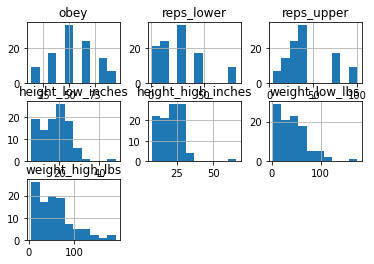

In [124]:
df.hist();

So it's a good practice visualize for interpreting the data. We use searborn library for visualizing. With heat __heap__ method we can see the correlated relation between the fields.

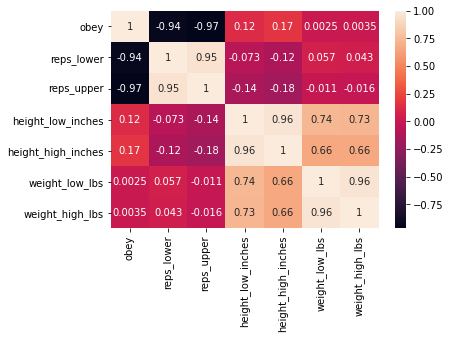

In [22]:
sns.heatmap(df.corr(), annot=True);

It seems Reps info (lower - upper), hight (low - high) and also weight (low - high) almost same. We may merge those data info one column to simplify data.

In [23]:
# find averages for the related data pairs
df['avg_reps'] = (df['reps_lower'] + df['reps_upper']) / 2 
df['avg_height'] = (df['height_low_inches'] + df['height_high_inches']) / 2 
df['avg_weight'] = (df['weight_low_lbs'] + df['weight_high_lbs']) / 2 
df.head()

,Breed,Classification,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,avg_reps,avg_height,avg_weight
0,Border Collie,Brightest Dogs,95.0,1,4,19.0,21.0,40,40,2.5,20.0,40.0
3,Golden Retriever,Brightest Dogs,95.0,1,4,21.0,24.0,55,75,2.5,22.5,65.0
4,Doberman Pinscher,Brightest Dogs,95.0,1,4,26.0,28.0,60,100,2.5,27.0,80.0
6,Labrador Retriever,Brightest Dogs,95.0,1,4,21.0,24.0,55,80,2.5,22.5,67.5
7,Papillon,Brightest Dogs,95.0,1,4,8.0,11.0,5,10,2.5,9.5,7.5


In [24]:
# Drop redundant fields to simplify data
df = df.rop(['reps_lower', 'reps_upper', 'height_low_inches', 'height_high_inches', 'weight_low_lbs', 'weight_high_lbs'], axis=1)
df.head()

,Breed,Classification,obey,avg_reps,avg_height,avg_weight
0,Border Collie,Brightest Dogs,95.0,2.5,20.0,40.0
3,Golden Retriever,Brightest Dogs,95.0,2.5,22.5,65.0
4,Doberman Pinscher,Brightest Dogs,95.0,2.5,27.0,80.0
6,Labrador Retriever,Brightest Dogs,95.0,2.5,22.5,67.5
7,Papillon,Brightest Dogs,95.0,2.5,9.5,7.5
